In [1]:
print('Importing relevant libraries')
import glob

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

Importing relevant libraries


/Users/chuamelia/anaconda/envs/py35/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
path ="/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/*.csv"

print("Retrieving all .csv files within directory...")
all_csvs = glob.glob(path)

Retrieving all .csv files within directory...


In [3]:
status_161DF = pd.DataFrame()
_list = []
#csv = '/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/event_csv/2018-04-06.csv'
for csv in all_csvs:
    status = pd.read_csv(csv, low_memory=False)
    status = status[["last_updated","station_id","num_bikes_available"]]

    status_161 = status[status["station_id"]==161]
    status_161 = status_161[["last_updated","num_bikes_available"]]

    status_161["last_updated"] = pd.to_datetime(status_161["last_updated"], unit='s')
    _list.append(status_161)
status_161DF = pd.concat(_list)

In [4]:
status_161Path = "/Users/chuamelia/Google Drive/Forecasting Time Series/citi-bike/ts-realtime-analysis-bike/status_161.csv"
status_161DF.to_csv(status_161Path, sep=",",index=False)

In [5]:
status_161DF.sort_values(["last_updated"]).head(5)

,last_updated,num_bikes_available
15,2018-04-07 01:10:48,28
828,2018-04-07 01:31:44,28
1641,2018-04-07 01:32:57,30
2454,2018-04-07 01:33:51,30
3267,2018-04-07 01:34:54,30


In [6]:
dta = status_161DF
dta.index = pd.DatetimeIndex(status_161DF["last_updated"].values)
del dta["last_updated"]

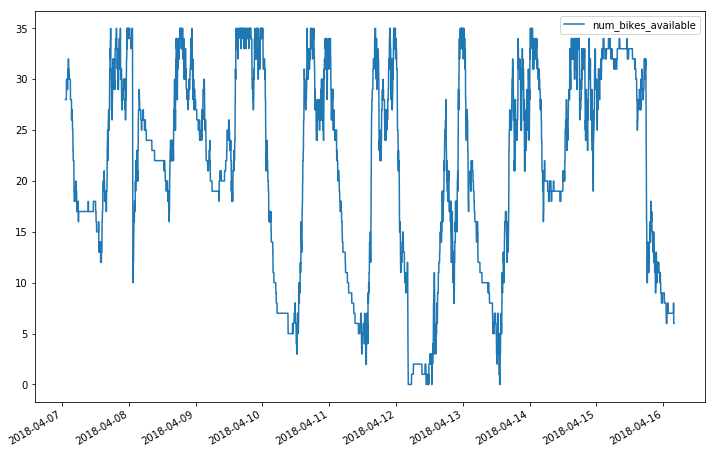

In [7]:
dta.plot(figsize=(12,8));

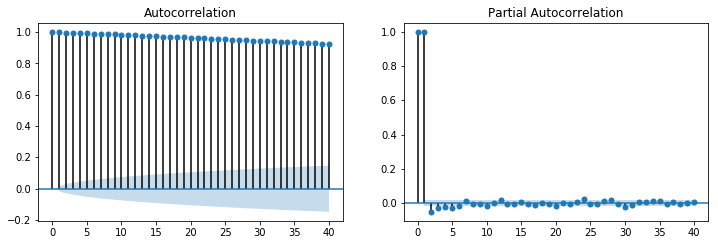

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

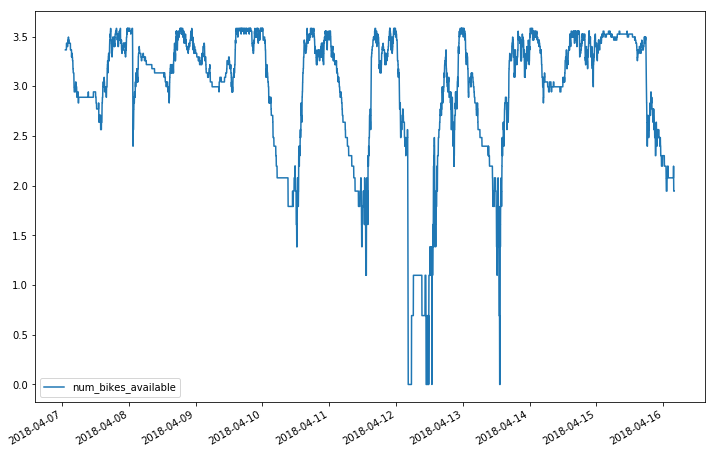

In [9]:
log_dta = dta
log_dta["num_bikes_available"] = np.log(log_dta["num_bikes_available"] + 1)

log_dta.plot(figsize=(12,8));

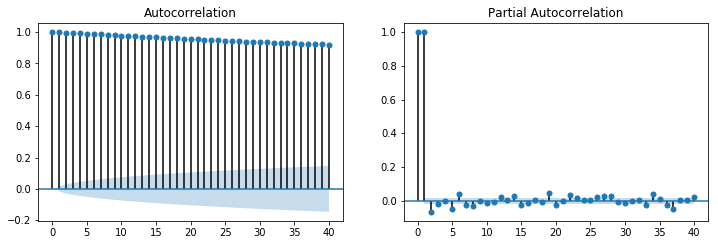

In [10]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(log_dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(log_dta, lags=40, ax=ax2)

In [30]:
log_dta.head(5)

,num_bikes_available
2018-04-07 01:10:48,3.367296
2018-04-07 01:31:44,3.367296
2018-04-07 01:32:57,3.433987
2018-04-07 01:33:51,3.433987
2018-04-07 01:34:54,3.433987


In [12]:
difflog_dta = log_dta

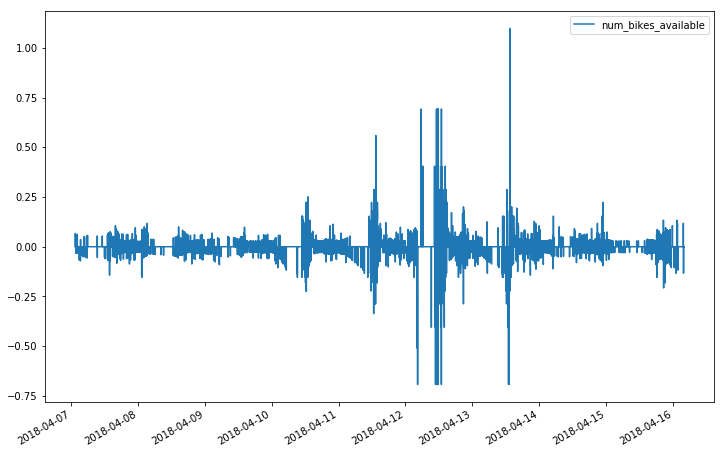

In [15]:
difflog_dta["num_bikes_available"] = np.insert(np.diff(difflog_dta["num_bikes_available"]), 0, None)

difflog_dta.plot(figsize=(12,8));

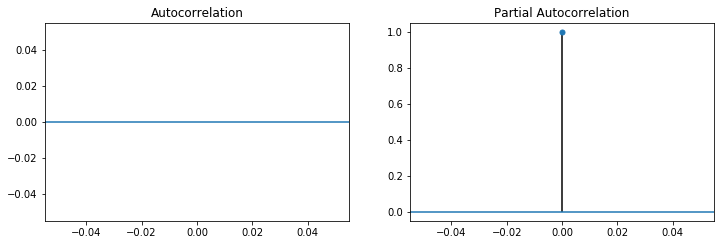

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(difflog_dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(difflog_dta, lags=40, ax=ax2)